'Gráfico de disperção'

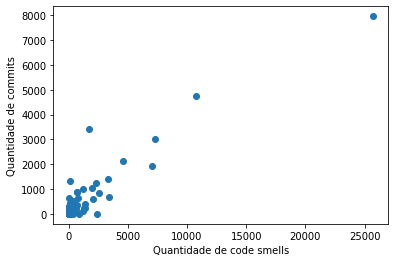

'Spearman: Quantidade de commits x Quantidade de code smells = 0.7965628790528839'

'Spearman: p=5.377181753913002e-28'

'Pearson: Quantidade de commits x Quantidade de code smells = 0.9296930298768734'

'Pearson: p=6.94615887723707e-54'

In [7]:
from IPython import get_ipython
get_ipython().magic('reset -sf')
import pyodbc
import pandas as pd
import scipy.stats as stats
from Query import Query
from configuration import Configuration
from matplotlib import pyplot
from IPython.core.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 0)

def showData(x,y,data):
     display ('Gráfico de disperção')
     data_x = data[x]
     data_y = data[y]
     pyplot.scatter(data_x, data_y)
     pyplot.xlabel("Quantidade de code smells")
     pyplot.ylabel("Quantidade de commits")
     pyplot.show()
     r, p = stats.stats.spearmanr(data_x, data_y)
     display( "Spearman: Quantidade de commits x Quantidade de code smells = {0}".format(r))
     display("Spearman: p={0}".format(p))
     r, p = stats.stats.pearsonr(data_x, data_y)
     display( "Pearson: Quantidade de commits x Quantidade de code smells = {0}".format(r))
     display("Pearson: p={0}".format(p))



def plot():
    conn = pyodbc.connect(Configuration.getConfigValue('database_connection'))
    query = Query.getQuery('hipotese')
    result = pd.read_sql_query(query,conn)
    dataframes = pd.DataFrame(result)
    if len(dataframes) == 0:
        display("Não há dados para analisar")
    else:
        showData("TOTAL_ADD","TOTAL_COMMITS" ,dataframes)

plot()